In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import sys

sys.path.append(os.path.abspath("../"))
from dataset import DS_NAMES
from dataset import DS_DIMENSIONS
from utilities.figure_tools import get_latest_results_directory, make_fig_directory, load_results

cmap = plt.get_cmap("Set1")
colors = cmap.colors

# results_path = "../results/vary_ntrees_sigtuned.csv"
# output_dir = "./vary-ntrees-sigtuned/"

results_path = "../results/vary_ntrees_reduced.csv"
output_dir = "./vary-ntrees-reduced/"

if not os.path.isdir(output_dir):
    os.makedirs(output_dir)

In [93]:
all_results = pd.read_csv(results_path).groupby(["dataset", "explainer", "n_trees"]).mean().reset_index()
print("explainers:", list(all_results["explainer"].unique()))
print("datasets", list(all_results["dataset"].unique()))
all_results.head()

explainers: ['AFT', 'FACETIndex', 'OCEAN']
datasets ['cancer', 'glass', 'magic', 'spambase', 'vertebral']


,dataset,explainer,n_trees,iteration,max_depth,accuracy,precision,recall,f1,per_valid,avg_dist,avg_length,prep_time,explain_time,sample_time,n_explain
0,cancer,AFT,10,4.5,5.0,0.947368,0.966667,0.852941,0.906250,0.40,0.091802,1.625000,0.0,0.037504,0.001875,20.0
1,cancer,AFT,50,0.0,5.0,0.947368,0.937500,0.882353,0.909091,0.40,0.127440,2.375000,0.0,0.221093,0.011055,20.0
2,cancer,AFT,100,0.0,5.0,0.956140,0.939394,0.911765,0.925373,0.35,0.123530,2.571429,0.0,0.374041,0.018702,20.0
3,cancer,AFT,200,0.0,5.0,0.956140,0.967742,0.882353,0.923077,0.35,0.120521,2.571429,0.0,1.054181,0.052709,20.0
4,cancer,AFT,300,0.0,5.0,0.956140,0.967742,0.882353,0.923077,0.35,0.119943,2.428571,0.0,1.540864,0.077043,20.0


In [94]:
idx_match = all_results["n_trees"] == 10
all_results[idx_match].to_csv("temp_table.csv", index=False)

In [95]:
cmap = plt.get_cmap("tab10")
colors = cmap.colors
ds_colors = {
    "cancer": colors[0],
    "glass": colors[1],
    "magic": colors[2],
    "spambase": colors[3],
    "vertebral": colors[4]
}
epl_colors = {
    "AFT": colors[0],
    "FACETIndex": colors[1],
    "OCEAN": colors[2],
    "RFOCSE": colors[3],
    "MACE": colors[4]
}
explainer_markers = {
    "AFT": "o",
    "FACETIndex": "^",
    "OCEAN": "s",
    "RFOCSE": "v",
    "MACE": "D"
}
marker_size = 8
line_width = 2
marker_sizes = {
    "AFT": marker_size,
    "FACETIndex": marker_size,
    "OCEAN": marker_size,
    "RFOCSE": marker_size,
    "MACE": marker_size
}

In [96]:
def render_plot(xfeature, yfeature, xlabel, ylabel, title, save_name=None, xrange=None, yrange=None, xlog=False, lloc=None, ylog=False):

    for ds in all_results["dataset"].unique():
        plt.figure()
        is_ds = all_results["dataset"] == ds
        for expl in all_results["explainer"].unique():
            is_expl = all_results["explainer"] == expl
            matching_rows = is_ds & is_expl
            plt.plot(all_results[matching_rows][xfeature], all_results[matching_rows][yfeature], label=expl, marker=explainer_markers[expl], lw=line_width, ms=marker_sizes[expl])

        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(ds)
        plt.legend(loc="best")
        if ylog:
            plt.yscale('log')
        if xrange is not None:
            plt.xlim(xrange)
        if yrange is not None:
            plt.ylim(yrange)
        if save_name is not None:
            plt.savefig(output_dir + ds + "_" + save_name, bbox_inches="tight")

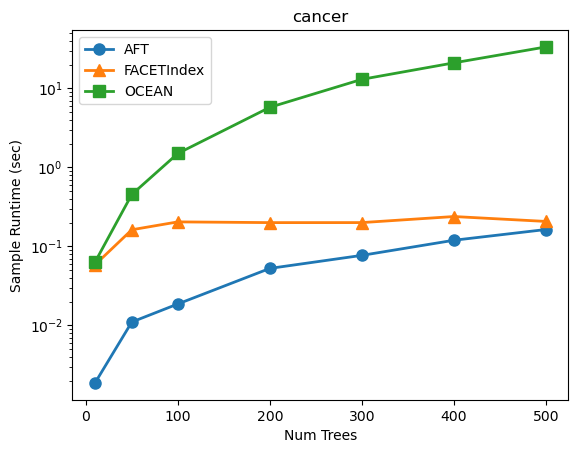

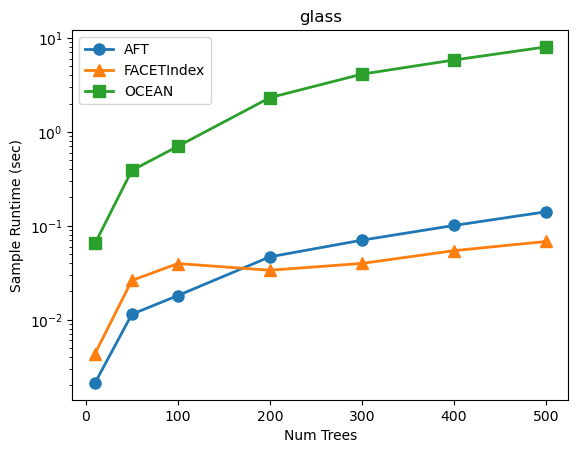

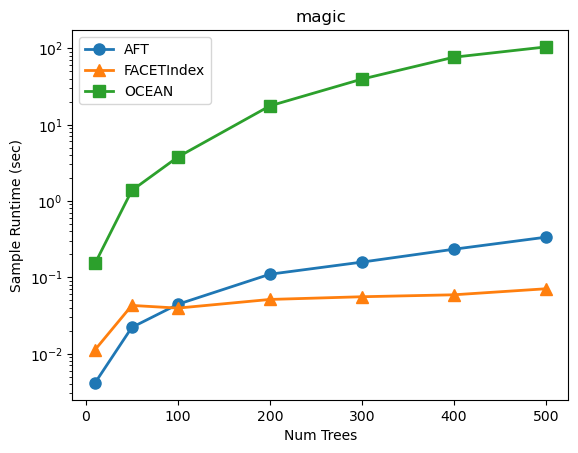

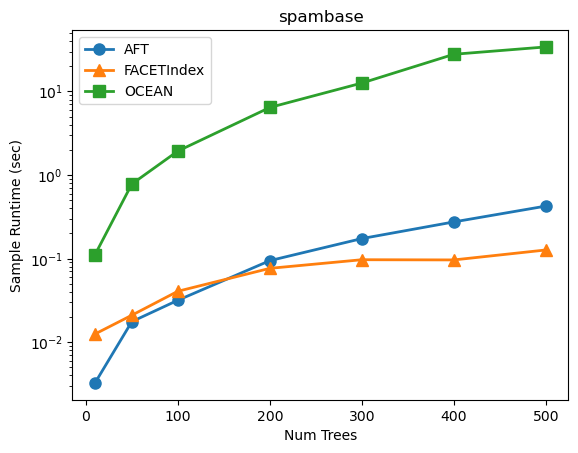

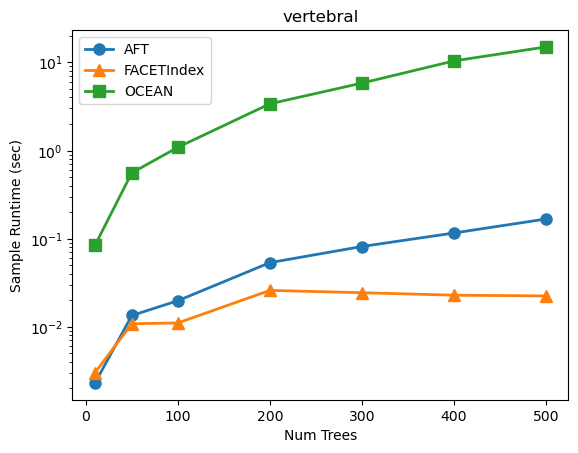

In [97]:
# sample time vs number of trees
render_plot("n_trees", "sample_time", "Num Trees", "Sample Runtime (sec)", "Explanation Time vs Num Trees", save_name="explaintime_vs_ntrees.png", ylog=True)

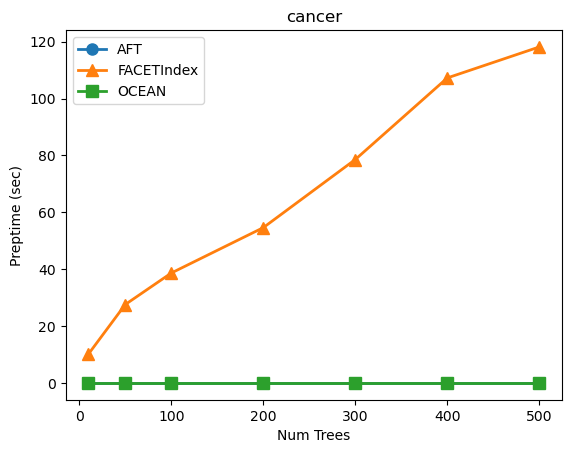

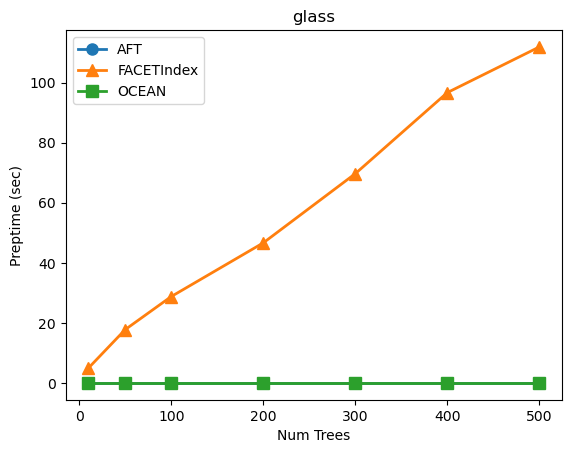

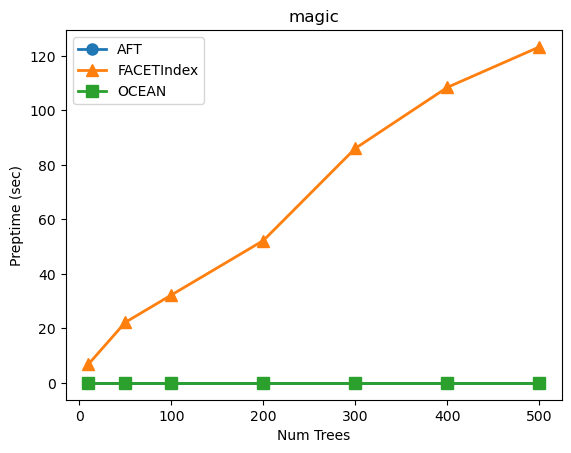

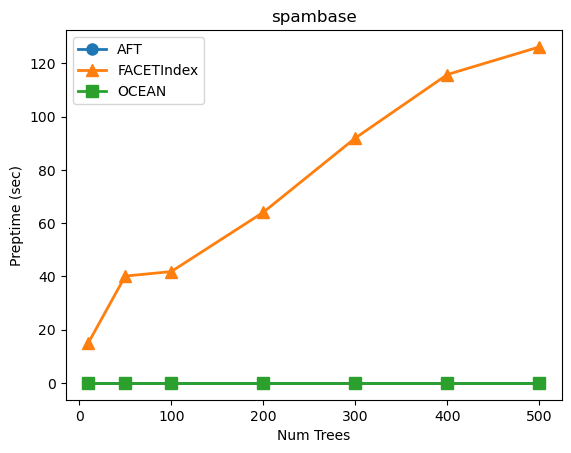

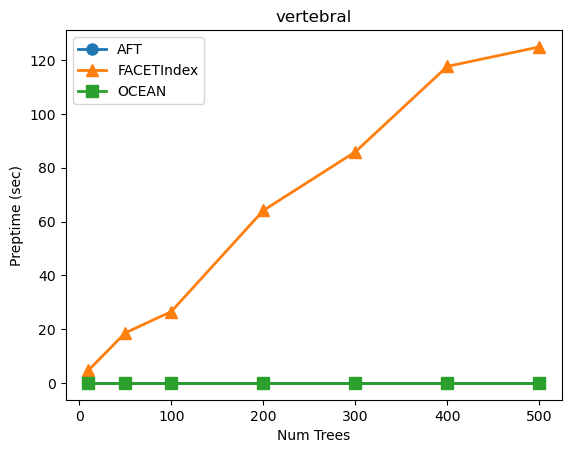

In [98]:
# prep time vs number of trees
render_plot("n_trees", "prep_time", "Num Trees", "Preptime (sec)", "Prep Time vs Num Trees", save_name=None)

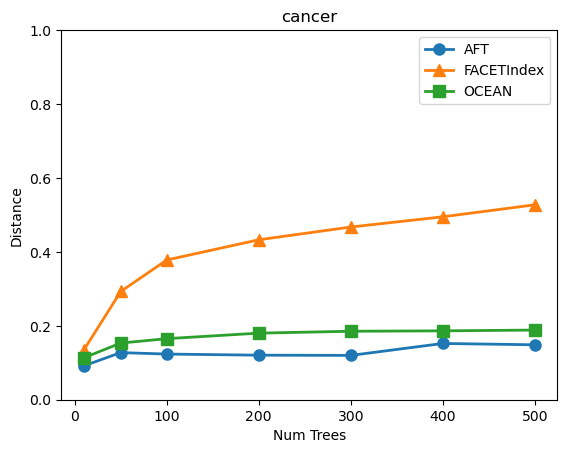

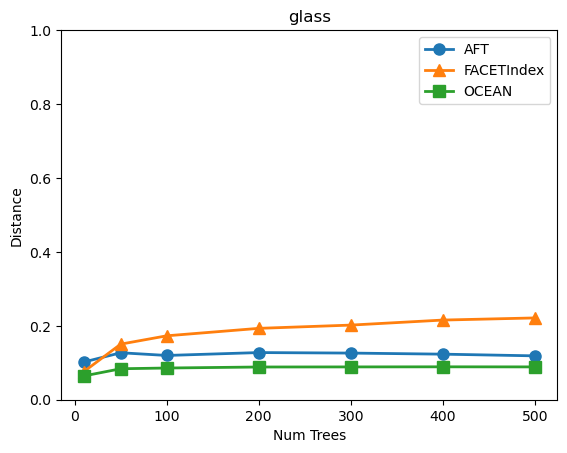

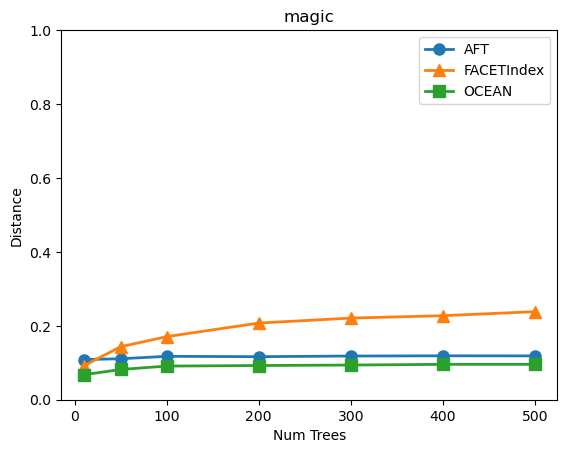

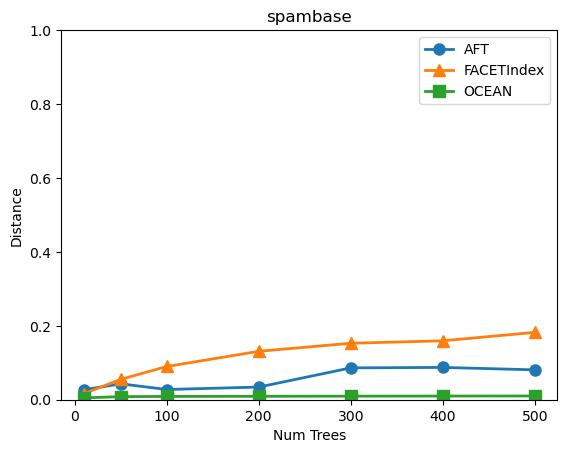

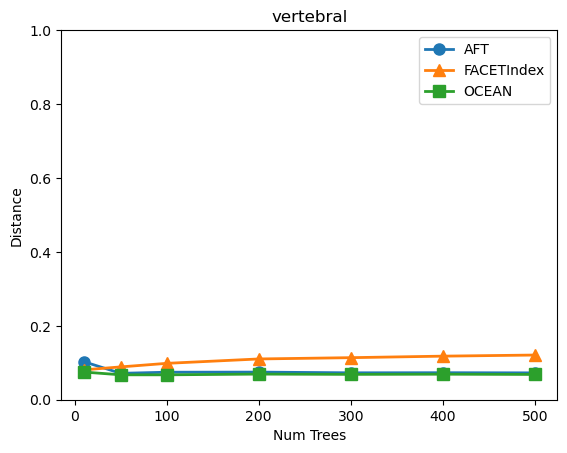

In [99]:
render_plot("n_trees", "avg_dist", "Num Trees", "Distance", "Average Distance vs Num Trees", save_name="avgdist", yrange=[0,1])

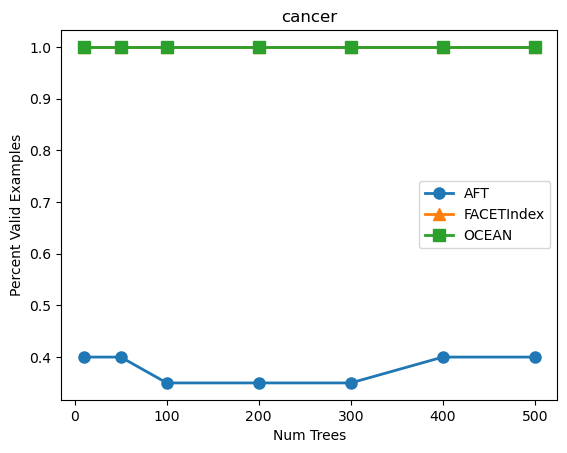

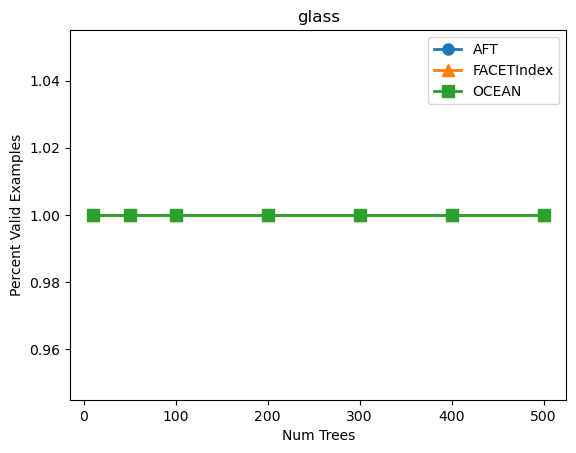

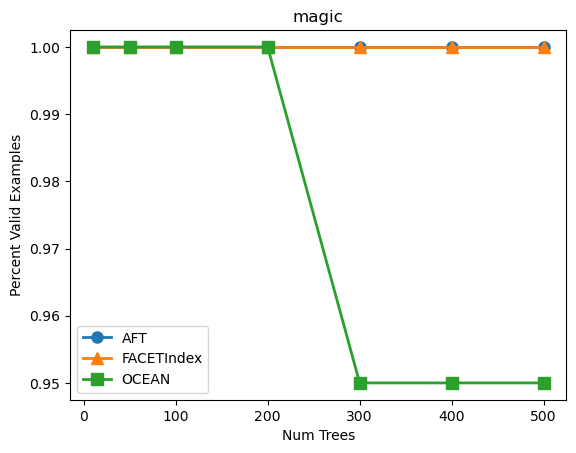

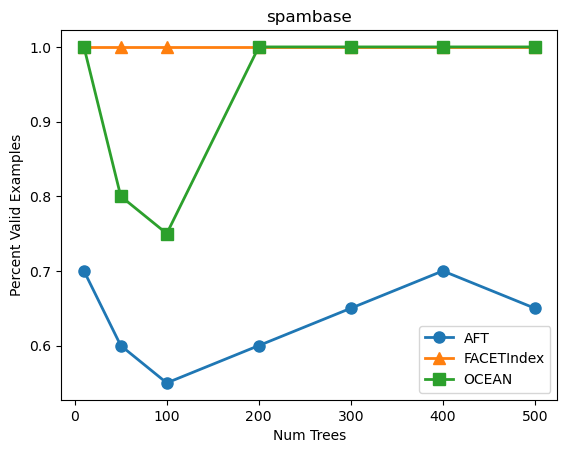

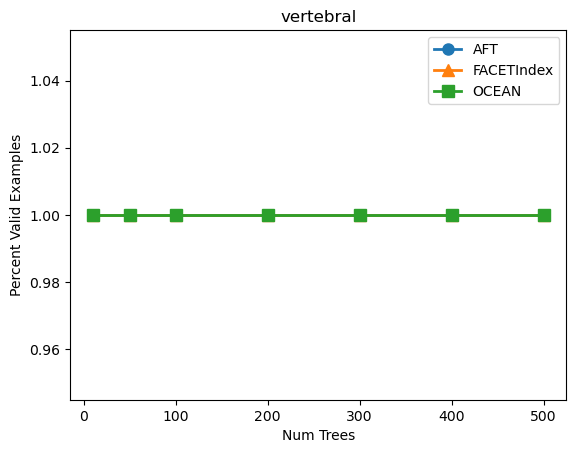

In [100]:
render_plot("n_trees", "per_valid", "Num Trees", "Percent Valid Examples", "Percent Valid Examples vs Num Trees", save_name=None)